In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 3989.56it/s]


In [6]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [7]:
# id_nodes_length_sub

In [8]:
# id_edges_length_sub

In [9]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# city_sub_nodes

In [13]:
# city_sub_stations

In [14]:
# city_sub_edges

In [15]:
# city_sub_routes

In [16]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [17]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [18]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [19]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [20]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [21]:
# city_sub_order_route_dict

In [22]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [23]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [24]:
# city_sub_all_shortest_paths_id_dict

In [25]:
# city_sub_edges

In [26]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [27]:
# city_sub_ordered_edges

In [28]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[3]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [29]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [30]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [31]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [32]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [33]:
# city_sub_extended_edges

### Organize edges dataframe for baseline network--city_sub_new_edges

In [34]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [35]:
# city_sub_shortest_path_edges_df

In [36]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [37]:
# city_sub_new_edges

### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [38]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [39]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [40]:
# city_sub_shortest_path_nodes_id

In [41]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [42]:
# city_sub_new_nodes

### Add columns to stations--city_sub_new_staions

In [43]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [44]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [45]:
# city_sub_new_stations

## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [46]:
connect_stations_name_metro,connect_stations_dataframe_metro = select_connect_stations_one_network(city_sub_new_stations)

In [47]:
connect_stations_name_metro

['Centraal Station', 'Spaklerweg', 'Van der Madeweg', 'Zuid']

In [48]:
# connect_stations_dataframe_metro

### Build connection edges

In [49]:
city_sub_connected_edges, city_sub_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_metro,city_sub_new_stations,id_edges_length_sub,city_sub_new_edges)

In [50]:
city_sub_connected_edges.sort_values(by='distance')

osm_id                                           geometry railway  \
373  503528036  LINESTRING (4.9276484 52.3324075, 4.9276417 52...  subway   
499  181750655  LINESTRING (4.9522734 52.3067117, 4.9522827 52...  subway   
498  503528136  LINESTRING (4.9521301 52.3066493, 4.9521206 52...  subway   
614  166161639  LINESTRING (4.9820769 52.3137638, 4.9820664 52...  subway   
594   39271205  LINESTRING (4.9743774 52.2955964, 4.9744107 52...  subway   
..         ...                                                ...     ...   
60    26982055  LINESTRING (4.8372863 52.3392173, 4.8369983 52...  subway   
607  166161630  LINESTRING (4.9791866 52.3170385, 4.978573 52....  subway   
588   23208282  LINESTRING (4.9728869 52.3236783, 4.9735608 52...  subway   
362  397809117  LINESTRING (4.926275 52.3971789, 4.9260716 52....  subway   
293  397809123  LINESTRING (4.9182755 52.3885941, 4.9184548 52...  subway   

    service   id  from_id  to_id     distance      time     to_from  \
373    yard  753      265    523     0.931719  0.000037  (523, 265)   
499    None  488      415    143     1.299982  0.000052  (143, 415)   
498    None  767      413    700     1.335778  0.000053  (700, 413)   
614    None  341      504    306     1.593889  0.000064  (306, 504)   
594    None  157      144    145     2.355372  0.000094  (145, 144)   
..      ...  ...      ...    ...          ...       ...         ...   
60     None   93      100    101   735.893891  0.029436  (101, 100)   
607    None  337      821    301   852.145611  0.034086  (301, 821)   
588    None   37       56    812   854.186556  0.034167   (812, 56)   
362    None  683      621    818  1108.588537  0.044344  (818, 621)   
293    None  686      817    624  1110.367311  0.044415  (624, 817)   

        from_to  count_weight                            route_name_list  \
373  (265, 523)           1.0  Metro 53: Centraal Station => Gaasperplas   
499  (415, 143)           1.0              Metro 50: Gein => Isolatorweg   
498  (413, 700)           1.0              Metro 50: Isolatorweg => Gein   
614  (504, 306)           1.0  Metro 53: Gaasperplas => Centraal Station   
594  (144, 145)           1.0              Metro 50: Isolatorweg => Gein   
..          ...           ...                                        ...   
60   (100, 101)           1.0              Metro 50: Gein => Isolatorweg   
607  (821, 301)           1.0  Metro 53: Gaasperplas => Centraal Station   
588   (56, 812)           1.0  Metro 53: Centraal Station => Gaasperplas   
362  (621, 818)           1.0                    Metro 52: Noord => Zuid   
293  (817, 624)           1.0                    Metro 52: Zuid => Noord   

      route     ref      weights  wcl_weights  
373  subway      53     0.931719     0.931719  
499  subway  50, 54     1.299982     1.299982  
498  subway  50, 54     1.335778     1.335778  
614  subway      53     1.593889     1.593889  
594  subway  50, 54     2.355372     2.355372  
..      ...     ...          ...          ...  
60   subway  50, 51   735.893891   735.893891  
607  subway      53   852.145611   852.145611  
588  subway      53   854.186556   854.186556  
362  subway      52  1108.588537  1108.588537  
293  subway      52  1110.367311  1110.367311  

[684 rows x 17 columns]

In [51]:
city_sub_connected_edges

osm_id                                           geometry railway  \
0    39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
1    23207806  LINESTRING (4.8338659 52.3643177, 4.8338791 52...  subway   
2    23207802  LINESTRING (4.8338791 52.3637859, 4.8339056 52...  subway   
3    26983218  LINESTRING (4.8339056 52.3629417, 4.8339159 52...  subway   
4    26983222  LINESTRING (4.8339159 52.3625717, 4.8339214 52...  subway   
..        ...                                                ...     ...   
679       NaN  LINESTRING (4.8772326 52.3393181, 4.8739781 52...     NaN   
680       NaN  LINESTRING (4.8772326 52.3393181, 4.8780248 52...     NaN   
681       NaN  LINESTRING (4.8780248 52.3393025, 4.8739633 52...     NaN   
682       NaN  LINESTRING (4.8780248 52.3393025, 4.8739781 52...     NaN   
683       NaN  LINESTRING (4.8780248 52.3393025, 4.8772326 52...     NaN   

    service    id  from_id  to_id    distance       time     to_from  \
0      None   163      147     25   31.352181   0.001254   (25, 147)   
1      None    16       25     23   59.170137   0.002367    (23, 25)   
2      None    15       23     24   93.935464   0.003757    (24, 23)   
3      None   106       24    109   41.168856   0.001647   (109, 24)   
4      None   114      109    588   11.809676   0.000472  (588, 109)   
..      ...   ...      ...    ...         ...        ...         ...   
679     NaN  1005      180     83  365.940055  15.000000   (83, 180)   
680     NaN  1006      180    345   88.233092  15.000000  (345, 180)   
681     NaN  1007      345    840  452.138504  15.000000  (840, 345)   
682     NaN  1008      345     83  453.103438  15.000000   (83, 345)   
683     NaN  1009      345    180   88.233092  15.000000  (180, 345)   

        from_to  count_weight                route_name_list   route     ref  \
0     (147, 25)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
1      (25, 23)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
2      (23, 24)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
3     (24, 109)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
4    (109, 588)           1.0  Metro 50: Isolatorweg => Gein  subway  50, 51   
..          ...           ...                            ...     ...     ...   
679   (180, 83)           NaN                            NaN     NaN     NaN   
680  (180, 345)           NaN                            NaN     NaN     NaN   
681  (345, 840)           NaN                            NaN     NaN     NaN   
682   (345, 83)           NaN                            NaN     NaN     NaN   
683  (345, 180)           NaN                            NaN     NaN     NaN   

         weights  wcl_weights  
0      31.352181    31.352181  
1      59.170137    59.170137  
2      93.935464    93.935464  
3      41.168856    41.168856  
4      11.809676    11.809676  
..           ...          ...  
679  6250.000000  1400.000000  
680  6250.000000  1400.000000  
681  6250.000000  1400.000000  
682  6250.000000  1400.000000  
683  6250.000000  1400.000000  

[684 rows x 17 columns]

In [52]:
duplicate_rows = city_sub_connected_edges[city_sub_connected_edges.duplicated(['id'], keep=False)]

In [53]:
duplicate_rows

Empty DataFrame
Columns: [osm_id, geometry, railway, service, id, from_id, to_id, distance, time, to_from, from_to, count_weight, route_name_list, route, ref, weights, wcl_weights]
Index: []

# Tram-Amsterdam

## Generate Baseline Networks

In [54]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 3336.68it/s]


Calculate_degree possibly unhappy


In [55]:
# city_tram_stations

In [56]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [57]:
id_nodes_length_tram

1920

In [58]:
id_edges_length_tram 

2204

In [59]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [60]:
# city_tram_edges

In [61]:
# city_tram_nodes

In [62]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [63]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time']]).to_file('city_tram_edges0612.GPKG',driver='GPKG')

In [64]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [65]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)

city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1641) & (city_tram_edges['to_id'] == 1576)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1640) & (city_tram_edges['to_id'] == 1641)].index, inplace=True)

city_tram_edges = city_tram_edges.reset_index(drop = True)

In [66]:
# city_tram_edges

In [67]:
# city_tram_nodes

In [68]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [69]:
# city_tram_stations

In [70]:
# city_tram_routes

In [71]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [72]:
# city_tram_order_id_pairs

In [73]:
# city_tram_all_shortest_paths_id_dict

In [74]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [75]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [76]:
# duplicated_rows

In [77]:
len(duplicated_rows)

18

In [78]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[3]}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [79]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [80]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [81]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [82]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [83]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [84]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [85]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [86]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [87]:
# city_tram_shortest_path_edges_df

In [88]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [89]:
# city_tram_new_edges

In [90]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_new_edges0612.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [91]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [92]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [93]:
# city_tram_shortest_path_nodes_id

In [94]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [95]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [96]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [97]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [98]:
# city_tram_new_stations

## Create virtual edges at connection stations on single tram network 

#### Select nodes where need to build virtual edges based on name

In [99]:
connect_stations_name_tram,connect_stations_dataframe_tram = select_connect_stations_one_network(city_tram_new_stations)

In [100]:
connect_stations_name_tram

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [101]:
# len(connect_stations_name_tram)

In [102]:
# connect_stations_dataframe_tram

### Build connection edges

In [103]:
id_edges_length_tram = city_tram_edges['id'].iloc[-1] + 1

In [104]:
# id_edges_length_tram

In [105]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_tram,city_tram_new_stations,id_edges_length_tram,city_tram_new_edges)

In [106]:
# len(city_tram_connect_edges_dfs)

In [107]:
city_tram_connected_edges.sort_values(by = 'distance')

osm_id                                           geometry railway  \
657   323311657  LINESTRING (4.8768971 52.368541, 4.8768934 52....    tram   
819    38297099  LINESTRING (4.8863435 52.3659309, 4.8863262 52...    tram   
267    58301767  LINESTRING (4.8502293 52.3700488, 4.8502361 52...    tram   
1082  559858046  LINESTRING (4.8989773 52.3621338, 4.898971 52....    tram   
1050  145037517  LINESTRING (4.8983188 52.3638329, 4.898313 52....    tram   
...         ...                                                ...     ...   
1313  482880274  LINESTRING (4.9211099 52.3761672, 4.9213634 52...    tram   
413   181985408  LINESTRING (4.8620835 52.2881778, 4.8619036 52...    tram   
362   181985414  LINESTRING (4.8573912 52.2812036, 4.8575146 52...    tram   
1445   27080835  LINESTRING (4.9578273 52.3729148, 4.9574885 52...    tram   
1386  261871725  LINESTRING (4.934167 52.3729446, 4.9346066 52....    tram   

     service    id  from_id  to_id     distance      time       to_from  \
657     None  1933     2534   1761     0.280113  0.000020  (1761, 2534)   
819     None  1380     2446    925     1.531862  0.000109   (925, 2446)   
267     None  1435     1742   1323     1.592935  0.000114  (1323, 1742)   
1082    None  2439     2741   2093     1.658505  0.000118  (2093, 2741)   
1050    None  1508     2431   1278     1.682443  0.000120  (1278, 2431)   
...      ...   ...      ...    ...          ...       ...           ...   
1313    None  2390     2064   1586   780.562390  0.055754  (1586, 2064)   
413     None  1605     1479   2410   885.201279  0.063229  (2410, 1479)   
362     None  1615     2572   2747  1120.694627  0.080050  (2747, 2572)   
1445    None  1255     1164   1163  1649.135271  0.117795  (1163, 1164)   
1386    None  1708     1588   1589  1653.759541  0.118126  (1589, 1588)   

           from_to  count_weight  \
657   (2534, 1761)           1.0   
819    (2446, 925)           1.0   
267   (1742, 1323)           1.0   
1082  (2741, 2093)           1.0   
1050  (2431, 1278)           1.0   
...            ...           ...   
1313  (2064, 1586)           1.0   
413   (1479, 2410)           1.0   
362   (2572, 2747)           1.0   
1445  (1164, 1163)           1.0   
1386  (1588, 1589)           1.0   

                                        route_name_list route        ref  \
657   Tram 17: Amsterdam Centraal Station => Amsterd...  tram  17, 19, 7   
819   Tram 12: Amsterdam Centraal Station => Amsterd...  tram      12, 2   
267   Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram          7   
1082  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram          4   
1050  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  tram          4   
...                                                 ...   ...        ...   
1313  Tram 26: Amsterdam Centraal Station => Amsterd...  tram         26   
413   Tram 25: Amsterdam Station Zuid => Amstelveen ...  tram         25   
362   Tram 25: Amstelveen Westwijk => Amsterdam Stat...  tram         25   
1445  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  tram         26   
1386  Tram 26: Amsterdam Centraal Station => Amsterd...  tram         26   

          weights  wcl_weights  
657      0.280113     0.280113  
819      1.531862     1.531862  
267      1.592935     1.592935  
1082     1.658505     1.658505  
1050     1.682443     1.682443  
...           ...          ...  
1313   780.562390   780.562390  
413    885.201279   885.201279  
362   1120.694627  1120.694627  
1445  1649.135271  1649.135271  
1386  1653.759541  1653.759541  

[1626 rows x 17 columns]

In [108]:
city_tram_connected_edges

osm_id                                           geometry railway  \
0      27053451  LINESTRING (4.7747567 52.3537327, 4.776554 52....    tram   
1      27053451  LINESTRING (4.776554 52.3530108, 4.7768363 52....    tram   
2     322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
3      27053451  LINESTRING (4.7829483 52.3504489, 4.7832821 52...    tram   
4     322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
...         ...                                                ...     ...   
1621        NaN  LINESTRING (4.9005615 52.3444211, 4.9003351 52...     NaN   
1622        NaN  LINESTRING (4.9005615 52.3444211, 4.9011051 52...     NaN   
1623        NaN  LINESTRING (4.9011051 52.3446536, 4.8997164 52...     NaN   
1624        NaN  LINESTRING (4.9011051 52.3446536, 4.9003351 52...     NaN   
1625        NaN  LINESTRING (4.9011051 52.3446536, 4.9005615 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
0       None  1229     1139   2576  146.423620   0.010459  (2576, 1139)   
1       None  1230     2576   2577  520.557938   0.037183  (2577, 2576)   
2       None  1872     2483   1715  211.216649   0.015087  (1715, 2483)   
3       None  1231     2577   1140  162.776889   0.011627  (1140, 2577)   
4       None  1871     2484   2483  534.194272   0.038157  (2483, 2484)   
...      ...   ...      ...    ...         ...        ...           ...   
1621     NaN  3337     2435   2453  437.333225  15.000000  (2453, 2435)   
1622     NaN  3338     2435   2434   73.869611  15.000000  (2434, 2435)   
1623     NaN  3339     2434   2454  380.749836  15.000000  (2454, 2434)   
1624     NaN  3340     2434   2453  403.451221  15.000000  (2453, 2434)   
1625     NaN  3341     2434   2435   73.869611  15.000000  (2435, 2434)   

           from_to  count_weight  \
0     (1139, 2576)           1.0   
1     (2576, 2577)           1.0   
2     (2483, 1715)           1.0   
3     (2577, 1140)           1.0   
4     (2484, 2483)           1.0   
...            ...           ...   
1621  (2435, 2453)           NaN   
1622  (2435, 2434)           NaN   
1623  (2434, 2454)           NaN   
1624  (2434, 2453)           NaN   
1625  (2434, 2435)           NaN   

                                        route_name_list route  ref  \
0     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
1     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
2     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1   
3     Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  tram    1   
4     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1   
...                                                 ...   ...  ...   
1621                                                NaN   NaN  NaN   
1622                                                NaN   NaN  NaN   
1623                                                NaN   NaN  NaN   
1624                                                NaN   NaN  NaN   
1625                                                NaN   NaN  NaN   

          weights  wcl_weights  
0      146.423620   146.423620  
1      520.557938   520.557938  
2      211.216649   211.216649  
3      162.776889   162.776889  
4      534.194272   534.194272  
...           ...          ...  
1621  6250.000000  1400.000000  
1622  6250.000000  1400.000000  
1623  6250.000000  1400.000000  
1624  6250.000000  1400.000000  
1625  6250.000000  1400.000000  

[1626 rows x 17 columns]

In [109]:
# city_tram_connect_edges_dfs

In [110]:
duplicate_rows = city_tram_connected_edges[city_tram_connected_edges.duplicated(['id'], keep=False)]
duplicate_rows.sort_values(by='id')

osm_id                                           geometry railway  \
1092  312009858  LINESTRING (4.8991685 52.3662087, 4.8991313 52...    tram   
1091  312009858  LINESTRING (4.8991685 52.3662087, 4.8991313 52...    tram   
668   325204605  LINESTRING (4.8769861 52.3703587, 4.8769277 52...    tram   
667   325204605  LINESTRING (4.8769861 52.3703587, 4.8769277 52...    tram   
662   582512959  LINESTRING (4.8769277 52.3704412, 4.8765273 52...    tram   
661   582512959  LINESTRING (4.8769277 52.3704412, 4.8765273 52...    tram   
677   582512961  LINESTRING (4.8775579 52.3695272, 4.8774741 52...    tram   
678   582512961  LINESTRING (4.8775579 52.3695272, 4.8774741 52...    tram   
877   708673972  LINESTRING (4.89045 52.3555619, 4.8905493 52.3...    tram   
878   708673972  LINESTRING (4.89045 52.3555619, 4.8905493 52.3...    tram   
1071  773877998  LINESTRING (4.8988497 52.3624034, 4.8987718 52...    tram   
1070  773877998  LINESTRING (4.8988497 52.3624034, 4.8987718 52...    tram   
1108  773878010  LINESTRING (4.8994013 52.3610002, 4.8994004 52...    tram   
1107  773878010  LINESTRING (4.8994013 52.3610002, 4.8994004 52...    tram   
1041  773880554  LINESTRING (4.8981946 52.3641005, 4.8978788 52...    tram   
1040  773880554  LINESTRING (4.8981946 52.3641005, 4.8978788 52...    tram   
777   847807655  LINESTRING (4.8821656 52.3832191, 4.8821775 52...    tram   
778   847807655  LINESTRING (4.8821656 52.3832191, 4.8821775 52...    tram   

     service    id  from_id  to_id    distance      time       to_from  \
1092    None  1772     1644   1645   55.916258  0.003994  (1645, 1644)   
1091    None  1772     1645   1644   55.916258  0.003994  (1644, 1645)   
668     None  2060     1844   1845   10.002816  0.000714  (1845, 1844)   
667     None  2060     1845   1844   10.002816  0.000714  (1844, 1845)   
662     None  2464     1845   2104  167.342971  0.011953  (2104, 1845)   
661     None  2464     2104   1845  167.342971  0.011953  (1845, 2104)   
677     None  2466     1844   2521  100.380732  0.007170  (2521, 1844)   
678     None  2466     2521   1844  100.380732  0.007170  (1844, 2521)   
877     None  2674      910   2059  120.083769  0.008577   (2059, 910)   
878     None  2674     2059    910  120.083769  0.008577   (910, 2059)   
1071    None  2916     2215   2094  127.308628  0.009093  (2094, 2215)   
1070    None  2916     2094   2215  127.308628  0.009093  (2215, 2094)   
1108    None  2920     2216   1577   96.096155  0.006864  (1577, 2216)   
1107    None  2920     1577   2216   96.096155  0.006864  (2216, 1577)   
1041    None  2923     1279   2020   92.331883  0.006595  (2020, 1279)   
1040    None  2923     2020   1279   92.331883  0.006595  (1279, 2020)   
777     None  3089     2767   1618    2.253333  0.000161  (1618, 2767)   
778     None  3089     1618   2767    2.253333  0.000161  (2767, 1618)   

           from_to  count_weight  \
1092  (1644, 1645)           2.0   
1091  (1645, 1644)           2.0   
668   (1844, 1845)           6.0   
667   (1845, 1844)           6.0   
662   (1845, 2104)           6.0   
661   (2104, 1845)           6.0   
677   (1844, 2521)           6.0   
678   (2521, 1844)           6.0   
877    (910, 2059)           2.0   
878    (2059, 910)           2.0   
1071  (2215, 2094)           2.0   
1070  (2094, 2215)           2.0   
1108  (2216, 1577)           2.0   
1107  (1577, 2216)           2.0   
1041  (1279, 2020)           2.0   
1040  (2020, 1279)           2.0   
777   (2767, 1618)           2.0   
778   (1618, 2767)           2.0   

                                        route_name_list route    ref  \
1092  Tram 14: Amsterdam Centraal Station => Amsterd...  tram     14   
1091  Tram 14: Amsterdam Centraal Station => Amsterd...  tram     14   
668   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
667   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
662   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  tram  17, 5   
66

In [111]:
len(duplicate_rows)

18

In [112]:
# gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_connected_edges20240612.gpkg',driver = 'GPKG')

# Create more OD pairs

### 先一一对应生成od对后再drop_duplicates

In [113]:
def s_e_od_pairs(city_sub_order_route_dict,city_sub_new_nodes):
    start_df = pd.DataFrame()
    each_o_point = pd.DataFrame()
    
    for route_name, station_df in city_sub_order_route_dict.items():
        each_o_point = station_df.iloc[[0]]
        start_df = pd.concat([start_df,each_o_point])[['name','geometry','route_name_list']]
    start_id_df = pd.merge(start_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]

    destination_df = pd.DataFrame()
    each_d_point = pd.DataFrame()
    
    for route_name, station_df in city_sub_order_route_dict.items():
        each_o_point = station_df.iloc[[-1]]
        destination_df = pd.concat([destination_df,each_o_point])[['name','geometry','route_name_list']]
    destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')[['name','route_name_list','id']]
    
    merged_id_df = start_id_df.merge(destination_id_df, on='route_name_list')
    
    pair_list = []
    
    for i in range(len(merged_id_df)):
        id_x = merged_id_df.loc[i, 'id_x']
        name_x = merged_id_df.loc[i, 'name_x']
    
        if i % 2 == 0: 
            id_y_values = merged_id_df['id_y'].drop(i+1)
            name_y_values = merged_id_df['name_y'].drop(i+1)
        else:
            id_y_values = merged_id_df['id_y'].drop(i-1)
            name_y_values = merged_id_df['name_y'].drop(i-1)
        
    
        for id_y, name_y in zip(id_y_values, name_y_values):
            if name_x != name_y:  
                pair_list.append((id_x, id_y))
    
    result_df = pd.DataFrame(pair_list, columns=['s_id', 'e_id'])
    result_df.drop_duplicates(subset=['s_id', 'e_id'], inplace=True)
    result_df.sort_values(by='e_id', inplace=True)
    result_df.reset_index(drop=True,inplace=True)
    return result_df,start_id_df,destination_id_df

In [114]:
city_sub_s_e_od_id_pairs_df, city_sub_start_id_df, city_sub_destination_id_df = s_e_od_pairs(city_sub_order_route_dict,city_sub_new_nodes)
city_sub_s_e_od_id_pairs_df

s_id  e_id
0    328    61
1    845    61
2    731    61
3    630    61
4    345    61
5    731   180
6    845   180
7    328   180
8    630   180
9    331   180
10   331   323
11   630   323
12   731   323
13   345   323
14   845   323
15   731   716
16   331   716
17   328   716
18   845   716
19   345   716
20   328   728
21   331   728
22   630   728
23   845   728
24   345   728
25   630   805
26   328   805
27   731   805
28   345   805
29   331   805

In [115]:
city_tram_s_e_od_id_pairs_df, city_tram_start_id_df, city_tram_destination_id_df = s_e_od_pairs(city_tram_order_route_dict,city_tram_new_nodes)
city_tram_s_e_od_id_pairs_df

s_id  e_id
0    1090  1043
1    2177  1043
2    2036  1043
3    2101  1043
4    1059  1043
..    ...   ...
641  2767  2780
642  2036  2780
643  1090  2780
644  1029  2780
645  1228  2780

[646 rows x 2 columns]

In [116]:
OD_id_pairs_df = pd.concat([city_sub_s_e_od_id_pairs_df,city_tram_s_e_od_id_pairs_df]).reset_index(drop=True)
OD_id_pairs_df = OD_id_pairs_df.drop(OD_id_pairs_df[(OD_id_pairs_df.s_id == 1068) & ~(OD_id_pairs_df.e_id.isin([1996, 1414]))].index)
OD_id_pairs_df = OD_id_pairs_df.drop(OD_id_pairs_df[(OD_id_pairs_df.e_id == 2300) & ~(OD_id_pairs_df.s_id.isin([1059, 1982]))].index)                                                                                                                                                                   

In [117]:
OD_id_pairs_df

s_id  e_id
0     328    61
1     845    61
2     731    61
3     630    61
4     345    61
..    ...   ...
671  2767  2780
672  2036  2780
673  1090  2780
674  1029  2780
675  1228  2780

[628 rows x 2 columns]

In [118]:
destination_id_df = pd.concat([city_sub_destination_id_df,city_tram_destination_id_df]).reset_index(drop=True)
destination_id_df = destination_id_df.drop_duplicates(subset='id').reset_index(drop=True)

In [119]:
destination_id_df

name  \
0                Isolatorweg   
1                       Gein   
2           Centraal Station   
3                       Zuid   
4                      Noord   
5                Gaasperplas   
6                 Matterhorn   
7         Muiderpoortstation   
8              Amstelstation   
9           Centraal Station   
10       Lambertus Zijlplein   
11          Centraal Station   
12                 Flevopark   
13          Centraal Station   
14            Dijkgraafplein   
15          Centraal Station   
16                     Sniep   
17        Station Sloterdijk   
18       Oudenaardeplantsoen   
19          Centraal Station   
20           De Boelelaan/VU   
21          Centraal Station   
22              Station Zuid   
23                  Westwijk   
24          Centraal Station   
25                    IJburg   
26            Van Hallstraat   
27          Centraal Station   
28                Drentepark   
29  Eerste Marnixdwarsstraat   
30      Amstelveen Stadshart   
31                Sloterpark   
32                Azartplein   

                                      route_name_list    id  
0                       Metro 50: Gein => Isolatorweg   805  
1                       Metro 50: Isolatorweg => Gein   323  
2           Metro 51: Isolatorweg => Centraal Station   728  
3                             Metro 52: Noord => Zuid   180  
4                             Metro 52: Zuid => Noord   716  
5           Metro 53: Centraal Station => Gaasperplas    61  
6   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  1715  
7   Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...  1840  
8   Tram 12: Amsterdam Centraal Station => Amsterd...  2101  
9   Tram 12: Amsterdam Amstelstation => Amsterdam ...  2754  
10  Tram 13: Amsterdam Centraal Station => Amsterd...  1101  
11  Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...  2780  
12  Tram 14: Amsterdam Centraal Station => Amsterd...  1160  
13  Tram 14: Amsterdam Flevopark => Amsterdam Cent...  2777  
14  Tram 17: Amsterdam Centraal Station => Amsterd...  1137  
15  Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...  2779  
16      Tram 19: Amsterdam Sloterdijk => Diemen Sniep  2212  
17      Tram 19: Diemen Sniep => Amsterdam Sloterdijk  1502  
18  Tram 2: Amsterdam Centraal Station => Amsterda...  1043  
19  Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...  2178  
20  Tram 24: Amsterdam Centraal Station => Amsterd...  1231  
21  Tram 24: Amsterdam VUmc => Amsterdam Centraal ...  2778  
22  Tram 25: Amstelveen Westwijk => Amsterdam Stat...  2300  
23  Tram 25: Amsterdam Station Zuid => Amstelveen ...  1414  
24  Tram 26: Amsterdam IJburg => Amsterdam Centraa...  1658  
25  Tram 26: Amsterdam Centraal Station => Amsterd...  2034  
26  Tram 3: Amsterdam Flevopark => Amsterdam Weste...  2037  
27  Tram 4: Amsterdam Station RAI => Amsterdam Cen...  2776  
28  Tram 4: Amsterdam Centraal Station => Amsterda...  1663  
29  Tram 5: Amstelveen Stadshart => Amsterdam Eers...  2767  
30  Tram 5: Amsterdam Eerste Marnixdwarsstraat => ...  1996  
31  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  1090  
32  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  1282

# Test OD pairs on normal situation

### Load DiGraph with city_two_layer_network_nodes and city_two_layer_network_edges

In [120]:
city_two_layer_network_nodes = pd.concat([city_sub_new_nodes,city_tram_new_nodes])
city_two_layer_network_nodes.reset_index(drop=True,inplace=True)

In [121]:
city_two_layer_network_edges = pd.concat([city_sub_connected_edges,city_tram_connected_edges])
city_two_layer_network_edges.reset_index(drop=True,inplace=True)

In [122]:
city_two_layer_network_edges

osm_id                                           geometry railway  \
0     39271219  LINESTRING (4.8338612 52.3645995, 4.8338659 52...  subway   
1     23207806  LINESTRING (4.8338659 52.3643177, 4.8338791 52...  subway   
2     23207802  LINESTRING (4.8338791 52.3637859, 4.8339056 52...  subway   
3     26983218  LINESTRING (4.8339056 52.3629417, 4.8339159 52...  subway   
4     26983222  LINESTRING (4.8339159 52.3625717, 4.8339214 52...  subway   
...        ...                                                ...     ...   
2305       NaN  LINESTRING (4.9005615 52.3444211, 4.9003351 52...     NaN   
2306       NaN  LINESTRING (4.9005615 52.3444211, 4.9011051 52...     NaN   
2307       NaN  LINESTRING (4.9011051 52.3446536, 4.8997164 52...     NaN   
2308       NaN  LINESTRING (4.9011051 52.3446536, 4.9003351 52...     NaN   
2309       NaN  LINESTRING (4.9011051 52.3446536, 4.9005615 52...     NaN   

     service    id  from_id  to_id    distance       time       to_from  \
0       None   163      147     25   31.352181   0.001254     (25, 147)   
1       None    16       25     23   59.170137   0.002367      (23, 25)   
2       None    15       23     24   93.935464   0.003757      (24, 23)   
3       None   106       24    109   41.168856   0.001647     (109, 24)   
4       None   114      109    588   11.809676   0.000472    (588, 109)   
...      ...   ...      ...    ...         ...        ...           ...   
2305     NaN  3337     2435   2453  437.333225  15.000000  (2453, 2435)   
2306     NaN  3338     2435   2434   73.869611  15.000000  (2434, 2435)   
2307     NaN  3339     2434   2454  380.749836  15.000000  (2454, 2434)   
2308     NaN  3340     2434   2453  403.451221  15.000000  (2453, 2434)   
2309     NaN  3341     2434   2435   73.869611  15.000000  (2435, 2434)   

           from_to  count_weight                route_name_list   route  \
0        (147, 25)           1.0  Metro 50: Isolatorweg => Gein  subway   
1         (25, 23)           1.0  Metro 50: Isolatorweg => Gein  subway   
2         (23, 24)           1.0  Metro 50: Isolatorweg => Gein  subway   
3        (24, 109)           1.0  Metro 50: Isolatorweg => Gein  subway   
4       (109, 588)           1.0  Metro 50: Isolatorweg => Gein  subway   
...            ...           ...                            ...     ...   
2305  (2435, 2453)           NaN                            NaN     NaN   
2306  (2435, 2434)           NaN                            NaN     NaN   
2307  (2434, 2454)           NaN                            NaN     NaN   
2308  (2434, 2453)           NaN                            NaN     NaN   
2309  (2434, 2435)           NaN                            NaN     NaN   

         ref      weights  wcl_weights  
0     50, 51    31.352181    31.352181  
1     50, 51    59.170137    59.170137  
2     50, 51    93.935464    93.935464  
3     50, 51    41.168856    41.168856  
4     50, 51    11.809676    11.809676  
...      ...          ...          ...  
2305     NaN  6250.000000  1400.000000  
2306     NaN  6250.000000  1400.000000  
2307     NaN  6250.000000  1400.000000  
2308     NaN  6250.000000  1400.000000  
2309     NaN  6250.000000  1400.000000  

[2310 rows x 17 columns]

In [123]:
G1 = nx.DiGraph()
for node_index, row in city_two_layer_network_nodes.iterrows():
    geometry = row['geometry']
    node_id = row['id']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [124]:
edges_for_G1 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    G1.add_edge(from_id, to_id, weight = weight)

### Test all OD pairs

In [125]:
OD_shortest_path_nodes_id = {}
OD_shortest_path_edges = {}

for index, row in OD_id_pairs_df.iterrows():
    path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weight")
    # path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weights")
    OD_shortest_path_nodes_id[index] = path_s_e
    OD_shortest_path_edges[index] = short_path_edges

In [126]:
OD_shortest_path_edges

{0:         osm_id                                           geometry railway  \
 394  166134293  LINESTRING (4.9302391 52.3297174, 4.9306158 52...  subway   
 400  166130762  LINESTRING (4.9307683 52.3291246, 4.9306158 52...  subway   
 402  166132395  LINESTRING (4.9308349 52.3293676, 4.9304544 52...  subway   
 405  166130762  LINESTRING (4.9310404 52.3288315, 4.9307683 52...  subway   
 408  166130762  LINESTRING (4.931109 52.3287536, 4.9310404 52....  subway   
 ..         ...                                                ...     ...   
 631  166187913  LINESTRING (4.9847396 52.2963405, 4.9850507 52...  subway   
 632  166187917  LINESTRING (4.9850507 52.2963421, 4.9856334 52...  subway   
 635  166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 661        NaN  LINESTRING (4.9304544 52.3297847, 4.9302391 52...     NaN   
 666        NaN  LINESTRING (4.9302391 52.3297174, 4.9304544 52...     NaN   
 
     service   id  from_id  to_id    distance       time   

In [127]:
OD_shortest_path_nodes_id

{0: [np.int64(328),
  np.float64(654.0),
  np.float64(321.0),
  np.float64(318.0),
  np.float64(634.0),
  np.float64(317.0),
  np.float64(330.0),
  np.float64(329.0),
  np.float64(342.0),
  np.float64(429.0),
  np.float64(428.0),
  np.float64(424.0),
  np.float64(423.0),
  np.float64(855.0),
  np.float64(422.0),
  np.float64(339.0),
  np.float64(334.0),
  np.float64(333.0),
  np.float64(338.0),
  np.float64(324.0),
  np.float64(325.0),
  np.float64(420.0),
  np.float64(702.0),
  np.float64(296.0),
  np.float64(286.0),
  np.float64(287.0),
  np.float64(703.0),
  np.float64(290.0),
  np.float64(854.0),
  np.float64(291.0),
  np.float64(292.0),
  np.float64(288.0),
  np.float64(573.0),
  np.float64(561.0),
  np.float64(289.0),
  np.float64(418.0),
  np.float64(419.0),
  np.float64(417.0),
  np.float64(610.0),
  np.float64(416.0),
  np.float64(699.0),
  np.float64(415.0),
  np.float64(143.0),
  np.float64(810.0),
  np.float64(142.0),
  np.float64(412.0),
  np.float64(697.0),
  np.float64(4

In [128]:
len(OD_shortest_path_nodes_id)

628

In [129]:
len(OD_shortest_path_edges)

628

# Test Random attack using percentage

## random_disruption_dwcl

In [130]:
def parameter_wcl(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id):
    for od, shortest_path_edges_df in OD_shortest_path_edges.items():
    
        # shortest_path_edges_df['DW_weights'] = 1 / shortest_path_edges_df['weights'].sum()
        shortest_path_edges_df['DW_weights'] = 1 / shortest_path_edges_df['wcl_weights'].sum()
        shortest_path_edges_df['DW_distance'] = 1 / shortest_path_edges_df['distance'].sum()
        
        if len(shortest_path_edges_df) > 1:  
            shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_weights')] = 0
            shortest_path_edges_df.iloc[1:, shortest_path_edges_df.columns.get_loc('DW_distance')] = 0
        
    grouped = OD_id_pairs_df.groupby('e_id').apply(lambda x: x.index.tolist())
    index_dict = grouped.to_dict()
    
    # Define an empty dictionary to store the merged DataFrames
    merged_df_dict = {}
    
    # Iterate over each key-value pair in index_dict
    for e_id, indices in index_dict.items():
        # Initialize an empty list to store DataFrames to merge
        dfs_to_merge = []
        
        # Loop through each index in the list of indices
        for idx in indices:
            # Check if the index exists in OD_shortest_path_edges
            if idx in OD_shortest_path_edges:
                # Append the corresponding DataFrame to the list
                dfs_to_merge.append(OD_shortest_path_edges[idx])
        
        # If there are DataFrames to merge, concatenate them
        if dfs_to_merge:
            merged_df = pd.concat(dfs_to_merge)
            # Store the merged DataFrame in the new dictionary
            merged_df_dict[e_id] = merged_df
            
    # Extract the last element from each list in OD_shortest_path_nodes_id.values()
    sink_id = [lst[-1] for lst in OD_shortest_path_nodes_id.values()]
    
    # Create a DataFrame with 'id' column from sink_id
    OD_sink_weight_df = pd.DataFrame({'id': sink_id})
    
    # Sort the DataFrame by 'id' and reset the index
    OD_sink_weight_df = OD_sink_weight_df.sort_values(by='id').reset_index(drop=True)
    
    # Count occurrences of each 'id' and add as a new column 'count'
    OD_sink_weight_df['count'] = OD_sink_weight_df.groupby('id')['id'].transform('size')
    
    # Remove duplicates based on 'id' to keep unique entries
    OD_sink_weight_df = OD_sink_weight_df.drop_duplicates(subset=['id']).reset_index(drop=True)
    
    # Iterate over merged_df_dict items to calculate 'weight' for each 'id'
    for e_id, all_edges_df in merged_df_dict.items():
        # Check if e_id is in 'id' column of OD_sink_weight_df
        if e_id in OD_sink_weight_df['id'].values:
            # Sum up the 'DW_weights' column in all_edges_df and assign to 'DW_weights' in OD_sink_weight_df
            OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_weights'] = all_edges_df['DW_weights'].sum()
            OD_sink_weight_df.loc[OD_sink_weight_df['id'] == e_id, 'DW_distance'] = all_edges_df['DW_distance'].sum()
            
    return OD_sink_weight_df

In [131]:
def remove_edges_by_percentage(graph, percentage):
    num_edges_to_remove = int(len(graph.edges) * percentage)
    edges_to_remove = random.sample(list(graph.edges), num_edges_to_remove)  # Convert graph.edges to a list
    graph.remove_edges_from(edges_to_remove)
    return edges_to_remove

### 0905

In [132]:
import numpy as np
import matplotlib.pyplot as plt

num_iterations = 200
all_dwcl_weights_dfs = []
all_dwcl_distance_dfs = []

for iteration in range(num_iterations):
    # Create DiGraph
    G2 = nx.DiGraph()
    
    # Add nodes to the graph
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x, y = geometry.x, geometry.y
        G2.add_node(node_id, pos=(x, y))
    
    # Add edges to the graph
    edges_for_G2 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    for _, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        G2.add_edge(from_id, to_id, weight=weight)
        
    columns = ['removed_edge_percentage', 'weighted_connectivity_loss']    
    dwcl_weights_each_disruption_1000 = pd.DataFrame()
    dwcl_distance_each_disruption_1000 = pd.DataFrame()
    all_edges_removed = pd.DataFrame()
    removed_edges_dict = {}
    OD_dis_shortest_path_edges_dict_random = {}
    
    for i in range(50):
        # Create a new DataFrame for each percentage
        percentage = 0.01
        DWCL_distance_each_disruption= pd.DataFrame(columns=columns)
        DWCL_distance_each_disruption['removed_edge_percentage'] = [percentage * (i+1)]
        DWCL_weigths_each_disruption= pd.DataFrame(columns=columns)
        DWCL_weigths_each_disruption['removed_edge_percentage'] = [percentage * (i+1)]
    
        # Remove edges by percentage and store them in the dictionary
        edges_to_remove = remove_edges_by_percentage(G2, percentage)
        edges_to_remove_df = pd.DataFrame(edges_to_remove, columns=['from_id', 'to_id'])
        merged_df = pd.merge(edges_to_remove_df, city_two_layer_network_edges, on=['from_id', 'to_id'], how='inner')
        all_edges_removed = pd.concat([all_edges_removed, merged_df], ignore_index=True)
        removed_edges_dict[i] = all_edges_removed
    
        # Run shortest path in each disruption situation
        OD_dis_shortest_path_nodes_id = {}
        OD_dis_shortest_path_edges = {}
        OD_dis_length_s_e = {}
        for index, row in OD_id_pairs_df.iterrows():
            try:
                path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, city_two_layer_network_edges, weight="weight")
                # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, city_two_layer_network_edges, weight="weights")
                OD_dis_shortest_path_nodes_id[index] = path_s_e
                OD_dis_shortest_path_edges[index] = short_path_edges
                OD_dis_length_s_e[index] = length_s_e
                OD_dis_shortest_path_edges_dict_random[i] = OD_dis_shortest_path_edges
            except nx.NetworkXNoPath:
                continue
       
        # # Calculate weighted connective loss metrics                
        OD_sink_weight_df = parameter_wcl(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id)
        OD_dis_sink_weight_df = parameter_wcl(OD_id_pairs_df,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
        OD_sink_id_wcl = pd.merge(OD_sink_weight_df,OD_dis_sink_weight_df,on='id',how='outer')
        OD_sink_id_wcl['count_y'] = OD_sink_id_wcl['count_y'].fillna(0)
        if OD_sink_id_wcl['count_y'].sum() == 0:
            OD_sink_id_wcl['DW_weights_y'] = 0
            OD_sink_id_wcl['DW_distance_y'] = 0
            OD_sink_id_wcl['DWCL_weights'] = OD_sink_id_wcl.apply(lambda row: (row['DW_weights_y']*row['count_y']) / (row['DW_weights']*row['count_x']), axis=1)
            OD_sink_id_wcl['DWCL_distance'] = OD_sink_id_wcl.apply(lambda row: (row['DW_distance_y']*row['count_y']) / (row['DW_distance']*row['count_x']), axis=1)
        else: 
            OD_sink_id_wcl['DW_weights_y'] = OD_sink_id_wcl['DW_weights_y'].fillna(0)
            OD_sink_id_wcl['DW_distance_y'] = OD_sink_id_wcl['DW_distance_y'].fillna(0)
            OD_sink_id_wcl['DWCL_weights'] = OD_sink_id_wcl.apply(lambda row: (row['DW_weights_y']*row['count_y']) / (row['DW_weights_x']*row['count_x']), axis=1)
            OD_sink_id_wcl['DWCL_distance'] = OD_sink_id_wcl.apply(lambda row: (row['DW_distance_y']*row['count_y']) / (row['DW_distance_x']*row['count_x']), axis=1)
           
        DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
        DWCL_weigths_each_disruption['weighted_connectivity_loss'] = DWCL_weigths
        DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)
        DWCL_distance_each_disruption['weighted_connectivity_loss'] = DWCL_distance
    
    
        # Create a new DataFrame with the SCL value and append it to scl_each_disruption_1000 using pd.concat
        dwcl_weights_each_disruption_1000 = pd.concat([dwcl_weights_each_disruption_1000, DWCL_weigths_each_disruption], ignore_index=True)
        dwcl_distance_each_disruption_1000 = pd.concat([dwcl_distance_each_disruption_1000, DWCL_distance_each_disruption], ignore_index=True)    
    
    all_dwcl_weights_dfs.append(dwcl_weights_each_disruption_1000)
    all_dwcl_distance_dfs.append(dwcl_distance_each_disruption_1000)

In [133]:
# Combine all the WCL data frames into one
combined_dwcl_weights_df = pd.concat(all_dwcl_weights_dfs)
combined_dwcl_weights_df.to_excel('dis3_dwcl_no_links_0905.xlsx',header=True,index=False)

# # Calculate mean and standard deviation of simple connectivity loss for each removed edge percentage
# mean_dwcl_weights = combined_dwcl_weights_df.groupby('removed_edge_percentage')['weighted_connectivity_loss'].mean()
# std_dwcl_weights = combined_dwcl_weights_df.groupby('removed_edge_percentage')['weighted_connectivity_loss'].std()

# # Plot the mean SCL with shaded area for standard deviation
# plt.fill_between(mean_dwcl_weights.index, mean_dwcl_weights - std_dwcl_weights, mean_dwcl_weights + std_dwcl_weights, color='b', alpha=0.2)
# plt.plot(mean_dwcl_weights.index, mean_dwcl_weights, color='b', label='Mean DWCL_run 200 times')


# plt.xlabel('Removed Edge Percentage')
# plt.ylabel('Weighted_connectivity_loss')
# plt.title('Weighted_connectivity_loss vs. Removed Edge Percentage')
# plt.legend(loc='lower right', fontsize='small')

# # Replace spaces in the title to create a valid file name
# plot_title = 'Weighted_connectivity_loss_vs_Removed Edge Percentage_no_links_0904.png'

# # Specify the path to save the plot
# save_path = os.path.join(os.getcwd(), plot_title)
# plt.savefig(save_path, bbox_inches='tight', dpi=600)

# print(f"Plot saved to {save_path}")
# # plt.show()

# Plot 4 results of Dis3

In [136]:
dis3_scl_0905 = pd.read_excel('dis3_scl_0905.xlsx')
dis3_scl_no_links_0905 = pd.read_excel('dis3_scl_no_links_0905.xlsx')
dis3_dwcl_0905 = pd.read_excel('dis3_dwcl_0905.xlsx')
dis3_dwcl_no_links_0905 = pd.read_excel('dis3_dwcl_no_links_0905.xlsx')

In [137]:
dis3_scl_0905['removed_edge_percentage'] = dis3_scl_0905['removed_edge_percentage']*100
dis3_scl_no_links_0905['removed_edge_percentage'] = dis3_scl_no_links_0905['removed_edge_percentage']*100
dis3_dwcl_0905['removed_edge_percentage'] = dis3_dwcl_0905['removed_edge_percentage']*100
dis3_dwcl_no_links_0905['removed_edge_percentage'] = dis3_dwcl_no_links_0905['removed_edge_percentage']*100

Plot saved to C:\projects\UTNCE\notebooks\scripts\Loss_Metrics_Value_vs_Removed_Edge_Percentage_0905.png


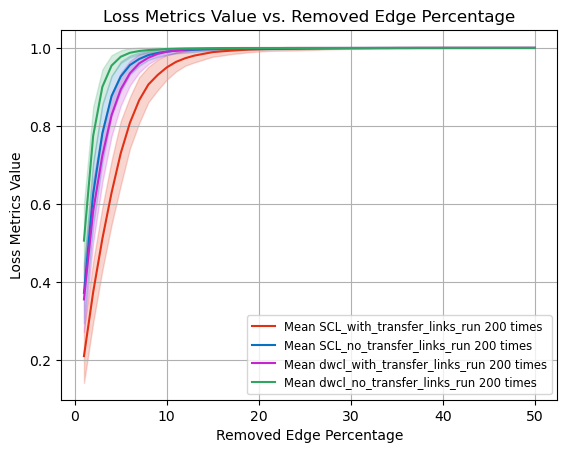

In [138]:
# Calculate mean and standard deviation of simple connectivity loss for each removed edge percentage
mean_scl_weights = dis3_scl_0905.groupby('removed_edge_percentage')['simple_connectivity_loss'].mean()
std_scl_weights = dis3_scl_0905.groupby('removed_edge_percentage')['simple_connectivity_loss'].std()

# Plot the mean SCL with shaded area for standard deviation
plt.fill_between(mean_scl_weights.index, mean_scl_weights - std_scl_weights, mean_scl_weights + std_scl_weights, color='#E23015', alpha=0.2)
plt.plot(mean_scl_weights.index, mean_scl_weights, color='#E23015', label='Mean SCL_with_transfer_links_run 200 times')


# Calculate mean and standard deviation of simple connectivity loss for each removed edge percentage
mean_scl_no_links_weights = dis3_scl_no_links_0905.groupby('removed_edge_percentage')['simple_connectivity_loss'].mean()
std_scl_no_links_weights = dis3_scl_no_links_0905.groupby('removed_edge_percentage')['simple_connectivity_loss'].std()

# Plot the mean SCL with shaded area for standard deviation
plt.fill_between(mean_scl_no_links_weights.index, mean_scl_no_links_weights - std_scl_no_links_weights, mean_scl_no_links_weights + std_scl_no_links_weights, color='#0871C1', alpha=0.2)
plt.plot(mean_scl_no_links_weights.index, mean_scl_no_links_weights, color='#0871C1', label='Mean SCL_no_transfer_links_run 200 times')


# Calculate mean and standard deviation of simple connectivity loss for each removed edge percentage
mean_dwcl_weights = dis3_dwcl_0905.groupby('removed_edge_percentage')['weighted_connectivity_loss'].mean()
std_dwcl_weights = dis3_dwcl_0905.groupby('removed_edge_percentage')['weighted_connectivity_loss'].std()

# Plot the mean dwcl with shaded area for standard deviation
plt.fill_between(mean_dwcl_weights.index, mean_dwcl_weights - std_dwcl_weights, mean_dwcl_weights + std_dwcl_weights, color='#C624CE', alpha=0.2)
plt.plot(mean_dwcl_weights.index, mean_dwcl_weights, color='#C624CE', label='Mean dwcl_with_transfer_links_run 200 times')


# Calculate mean and standard deviation of simple connectivity loss for each removed edge percentage
mean_dwcl_no_links_weights = dis3_dwcl_no_links_0905.groupby('removed_edge_percentage')['weighted_connectivity_loss'].mean()
std_dwcl_no_links_weights = dis3_dwcl_no_links_0905.groupby('removed_edge_percentage')['weighted_connectivity_loss'].std()

# Plot the mean dwcl with shaded area for standard deviation
plt.fill_between(mean_dwcl_no_links_weights.index, mean_dwcl_no_links_weights - std_dwcl_no_links_weights, mean_dwcl_no_links_weights + std_dwcl_no_links_weights, color='#2FA562', alpha=0.2)
plt.plot(mean_dwcl_no_links_weights.index, mean_dwcl_no_links_weights, color='#2FA562', label='Mean dwcl_no_transfer_links_run 200 times')

# Add grid lines
plt.grid(True)  # This adds grid lines on both x and y axes

plt.xlabel('Removed Edge Percentage')
plt.ylabel('Loss Metrics Value')
plt.title('Loss Metrics Value vs. Removed Edge Percentage')
plt.legend(loc='lower right', fontsize='small')

# Replace spaces in the title to create a valid file name
plot_title = 'Loss_Metrics_Value_vs_Removed_Edge_Percentage_0905.png'

# Specify the path to save the plot
save_path = os.path.join(os.getcwd(), plot_title)
plt.savefig(save_path, bbox_inches='tight', dpi=600)

print(f"Plot saved to {save_path}")
plt.show()

Plot saved to C:\projects\UTNCE\notebooks\scripts\4_Loss_Metrics_Values_vs_Removed_Edge_Percentages_0905.png


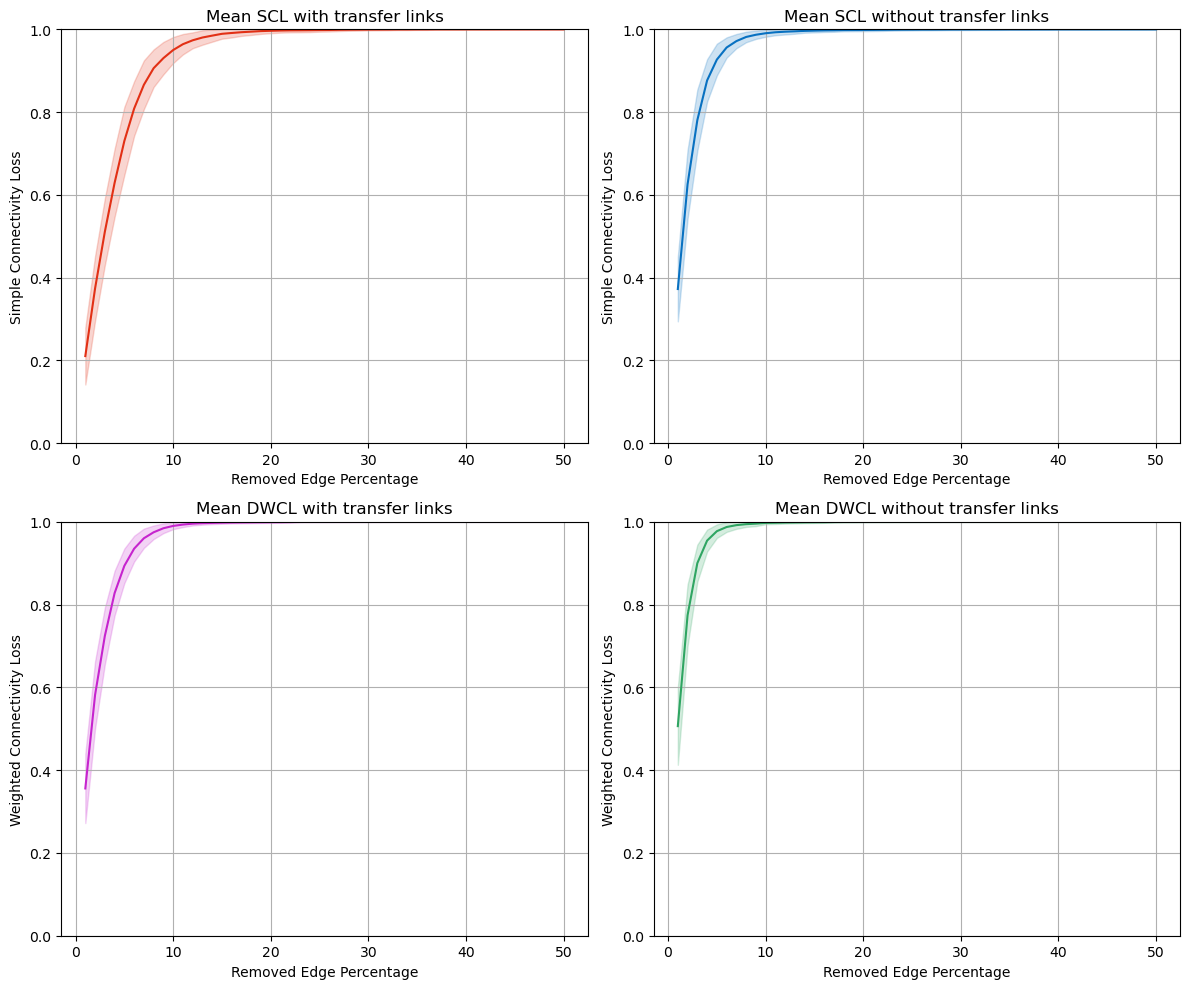

In [141]:
import matplotlib.pyplot as plt
import os

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First subplot: Mean SCL with transfer links
mean_scl_weights = dis3_scl_0905.groupby('removed_edge_percentage')['simple_connectivity_loss'].mean()
std_scl_weights = dis3_scl_0905.groupby('removed_edge_percentage')['simple_connectivity_loss'].std()

axs[0, 0].fill_between(mean_scl_weights.index, mean_scl_weights - std_scl_weights, mean_scl_weights + std_scl_weights, color='#E23015', alpha=0.2)
axs[0, 0].plot(mean_scl_weights.index, mean_scl_weights, color='#E23015', label='Mean SCL_with_transfer_links')
axs[0, 0].set_title('Mean SCL with transfer links')
axs[0, 0].set_xlabel('Removed Edge Percentage')
axs[0, 0].set_ylabel('Simple Connectivity Loss')
axs[0, 0].grid(True)

# Second subplot: Mean SCL without transfer links
mean_scl_no_links_weights = dis3_scl_no_links_0905.groupby('removed_edge_percentage')['simple_connectivity_loss'].mean()
std_scl_no_links_weights = dis3_scl_no_links_0905.groupby('removed_edge_percentage')['simple_connectivity_loss'].std()

axs[0, 1].fill_between(mean_scl_no_links_weights.index, mean_scl_no_links_weights - std_scl_no_links_weights, mean_scl_no_links_weights + std_scl_no_links_weights, color='#0871C1', alpha=0.2)
axs[0, 1].plot(mean_scl_no_links_weights.index, mean_scl_no_links_weights, color='#0871C1', label='Mean SCL_no_transfer_links')
axs[0, 1].set_title('Mean SCL without transfer links')
axs[0, 1].set_xlabel('Removed Edge Percentage')
axs[0, 1].set_ylabel('Simple Connectivity Loss')
axs[0, 1].grid(True)

# Third subplot: Mean DWCL with transfer links
mean_dwcl_weights = dis3_dwcl_0905.groupby('removed_edge_percentage')['weighted_connectivity_loss'].mean()
std_dwcl_weights = dis3_dwcl_0905.groupby('removed_edge_percentage')['weighted_connectivity_loss'].std()

axs[1, 0].fill_between(mean_dwcl_weights.index, mean_dwcl_weights - std_dwcl_weights, mean_dwcl_weights + std_dwcl_weights, color='#C624CE', alpha=0.2)
axs[1, 0].plot(mean_dwcl_weights.index, mean_dwcl_weights, color='#C624CE', label='Mean DWCL_with_transfer_links')
axs[1, 0].set_title('Mean DWCL with transfer links')
axs[1, 0].set_xlabel('Removed Edge Percentage')
axs[1, 0].set_ylabel('Weighted Connectivity Loss')
axs[1, 0].grid(True)

# Fourth subplot: Mean DWCL without transfer links
mean_dwcl_no_links_weights = dis3_dwcl_no_links_0905.groupby('removed_edge_percentage')['weighted_connectivity_loss'].mean()
std_dwcl_no_links_weights = dis3_dwcl_no_links_0905.groupby('removed_edge_percentage')['weighted_connectivity_loss'].std()

axs[1, 1].fill_between(mean_dwcl_no_links_weights.index, mean_dwcl_no_links_weights - std_dwcl_no_links_weights, mean_dwcl_no_links_weights + std_dwcl_no_links_weights, color='#2FA562', alpha=0.2)
axs[1, 1].plot(mean_dwcl_no_links_weights.index, mean_dwcl_no_links_weights, color='#2FA562', label='Mean DWCL_no_transfer_links')
axs[1, 1].set_title('Mean DWCL without transfer links')
axs[1, 1].set_xlabel('Removed Edge Percentage')
axs[1, 1].set_ylabel('Weighted Connectivity Loss')
axs[1, 1].grid(True)

# Get the global y-axis limits across all plots
min_y = min(mean_scl_weights.min(), mean_scl_no_links_weights.min(), mean_dwcl_weights.min(), mean_dwcl_no_links_weights.min())
max_y = max(mean_scl_weights.max(), mean_scl_no_links_weights.max(), mean_dwcl_weights.max(), mean_dwcl_no_links_weights.max())

# Apply the same y-axis limits to all subplots
for ax in axs.flat:
    ax.set_ylim([0, 1.0])
    
# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Replace spaces in the title to create a valid file name
plot_title = '4_Loss_Metrics_Values_vs_Removed_Edge_Percentages_0905.png'

# Specify the path to save the plot
save_path = os.path.join(os.getcwd(), plot_title)
plt.savefig(save_path, bbox_inches='tight', dpi=600)

print(f"Plot saved to {save_path}")

plt.show()

### 0904

In [135]:
import numpy as np
import matplotlib.pyplot as plt

num_iterations = 200
all_dwcl_weights_dfs = []
all_dwcl_distance_dfs = []

for iteration in range(num_iterations):
    # Create DiGraph
    G2 = nx.DiGraph()
    
    # Add nodes to the graph
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x, y = geometry.x, geometry.y
        G2.add_node(node_id, pos=(x, y))
    
    # Add edges to the graph
    edges_for_G2 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    for _, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        G2.add_edge(from_id, to_id, weight=weight)
        
    columns = ['removed_edge_percentage', 'weighted_connectivity_loss']    
    dwcl_weights_each_disruption_1000 = pd.DataFrame()
    dwcl_distance_each_disruption_1000 = pd.DataFrame()
    all_edges_removed = pd.DataFrame()
    removed_edges_dict = {}
    OD_dis_shortest_path_edges_dict_random = {}
    
    for i in range(50):
        # Create a new DataFrame for each percentage
        percentage = 0.01
        DWCL_distance_each_disruption= pd.DataFrame(columns=columns)
        DWCL_distance_each_disruption['removed_edge_percentage'] = [percentage * (i+1)]
        DWCL_weigths_each_disruption= pd.DataFrame(columns=columns)
        DWCL_weigths_each_disruption['removed_edge_percentage'] = [percentage * (i+1)]
    
        # Remove edges by percentage and store them in the dictionary
        edges_to_remove = remove_edges_by_percentage(G2, percentage)
        edges_to_remove_df = pd.DataFrame(edges_to_remove, columns=['from_id', 'to_id'])
        merged_df = pd.merge(edges_to_remove_df, city_two_layer_network_edges, on=['from_id', 'to_id'], how='inner')
        all_edges_removed = pd.concat([all_edges_removed, merged_df], ignore_index=True)
        removed_edges_dict[i] = all_edges_removed
    
        # Run shortest path in each disruption situation
        OD_dis_shortest_path_nodes_id = {}
        OD_dis_shortest_path_edges = {}
        OD_dis_length_s_e = {}
        for index, row in OD_id_pairs_df.iterrows():
            try:
                path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, city_two_layer_network_edges, weight="weight")
                # path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, city_two_layer_network_edges, weight="weights")
                OD_dis_shortest_path_nodes_id[index] = path_s_e
                OD_dis_shortest_path_edges[index] = short_path_edges
                OD_dis_length_s_e[index] = length_s_e
                OD_dis_shortest_path_edges_dict_random[i] = OD_dis_shortest_path_edges
            except nx.NetworkXNoPath:
                continue
       
        # # Calculate weighted connective loss metrics                
        OD_sink_weight_df = parameter_wcl(OD_id_pairs_df,OD_shortest_path_edges,OD_shortest_path_nodes_id)
        OD_dis_sink_weight_df = parameter_wcl(OD_id_pairs_df,OD_dis_shortest_path_edges,OD_dis_shortest_path_nodes_id)
        OD_sink_id_wcl = pd.merge(OD_sink_weight_df,OD_dis_sink_weight_df,on='id',how='outer')
        OD_sink_id_wcl['count_y'] = OD_sink_id_wcl['count_y'].fillna(0)
        if OD_sink_id_wcl['count_y'].sum() == 0:
            OD_sink_id_wcl['DW_weights_y'] = 0
            OD_sink_id_wcl['DW_distance_y'] = 0
            OD_sink_id_wcl['DWCL_weights'] = OD_sink_id_wcl.apply(lambda row: (row['DW_weights_y']*row['count_y']) / (row['DW_weights']*row['count_x']), axis=1)
            OD_sink_id_wcl['DWCL_distance'] = OD_sink_id_wcl.apply(lambda row: (row['DW_distance_y']*row['count_y']) / (row['DW_distance']*row['count_x']), axis=1)
        else: 
            OD_sink_id_wcl['DW_weights_y'] = OD_sink_id_wcl['DW_weights_y'].fillna(0)
            OD_sink_id_wcl['DW_distance_y'] = OD_sink_id_wcl['DW_distance_y'].fillna(0)
            OD_sink_id_wcl['DWCL_weights'] = OD_sink_id_wcl.apply(lambda row: (row['DW_weights_y']*row['count_y']) / (row['DW_weights_x']*row['count_x']), axis=1)
            OD_sink_id_wcl['DWCL_distance'] = OD_sink_id_wcl.apply(lambda row: (row['DW_distance_y']*row['count_y']) / (row['DW_distance_x']*row['count_x']), axis=1)
           
        DWCL_weigths = 1- sum(OD_sink_id_wcl.DWCL_weights) / len(destination_id_df)
        DWCL_weigths_each_disruption['weighted_connectivity_loss'] = DWCL_weigths
        DWCL_distance = 1- sum(OD_sink_id_wcl.DWCL_distance) / len(destination_id_df)
        DWCL_distance_each_disruption['weighted_connectivity_loss'] = DWCL_distance
    
    
        # Create a new DataFrame with the SCL value and append it to scl_each_disruption_1000 using pd.concat
        dwcl_weights_each_disruption_1000 = pd.concat([dwcl_weights_each_disruption_1000, DWCL_weigths_each_disruption], ignore_index=True)
        dwcl_distance_each_disruption_1000 = pd.concat([dwcl_distance_each_disruption_1000, DWCL_distance_each_disruption], ignore_index=True)    
    
    all_dwcl_weights_dfs.append(dwcl_weights_each_disruption_1000)
    all_dwcl_distance_dfs.append(dwcl_distance_each_disruption_1000)

Plot saved to C:\projects\UTNCE\notebooks\scripts\Weighted_connectivity_loss_vs_Removed Edge Percentage_no_links_0904.png


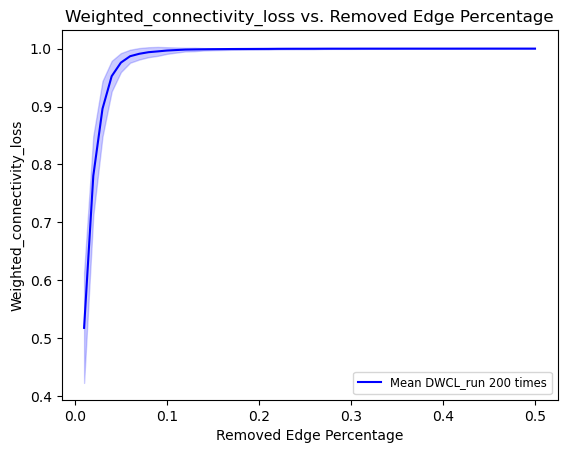

In [136]:
# Combine all the WCL data frames into one
combined_dwcl_weights_df = pd.concat(all_dwcl_weights_dfs)

# Calculate mean and standard deviation of simple connectivity loss for each removed edge percentage
mean_dwcl_weights = combined_dwcl_weights_df.groupby('removed_edge_percentage')['weighted_connectivity_loss'].mean()
std_dwcl_weights = combined_dwcl_weights_df.groupby('removed_edge_percentage')['weighted_connectivity_loss'].std()

# Plot the mean SCL with shaded area for standard deviation
plt.fill_between(mean_dwcl_weights.index, mean_dwcl_weights - std_dwcl_weights, mean_dwcl_weights + std_dwcl_weights, color='b', alpha=0.2)
plt.plot(mean_dwcl_weights.index, mean_dwcl_weights, color='b', label='Mean DWCL_run 200 times')


plt.xlabel('Removed Edge Percentage')
plt.ylabel('Weighted_connectivity_loss')
plt.title('Weighted_connectivity_loss vs. Removed Edge Percentage')
plt.legend(loc='lower right', fontsize='small')

# Replace spaces in the title to create a valid file name
plot_title = 'Weighted_connectivity_loss_vs_Removed Edge Percentage_no_links_0904.png'

# Specify the path to save the plot
save_path = os.path.join(os.getcwd(), plot_title)
plt.savefig(save_path, bbox_inches='tight', dpi=600)

print(f"Plot saved to {save_path}")
# plt.show()

In [137]:
combined_dwcl_weights_df.to_excel('dis3_dwcl_no_links_0905.xlsx',header=True,index=False)